# K-Level Approach

Li, S.-C., Tai, B.-C., & Huang, Y. (2019). Evaluating Variational Autoencoder as a Private Data Release Mechanism for Tabular Data. In 2019 IEEE 24th Pacific Rim International Symposium on Dependable Computing (PRDC) (pp. 198–1988). IEEE. https://doi.org/10.1109/PRDC47002.2019.00050

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import os

In [4]:
def calculate_k_levels(df):
    
    # Calculate K-level for combinations of columns
    sorted_group_sizes_dict = {}
    for i in range(len(df.columns)):
        for j in range(i + 1, len(df.columns)):
            combination_name = df.columns[i] + "_" + df.columns[j]
            group_sizes = df.groupby([df.columns[i], df.columns[j]]).size()
            sorted_group_sizes = group_sizes.sort_values(ascending=True)
            sorted_group_sizes_dict[combination_name] = sorted_group_sizes
    return sorted_group_sizes_dict

In [5]:
def k_level_comparsion(df_original, sorted_group_sizes_dict):

    k_level = []
    for keys in sorted_group_sizes_dict:
        column1, column2 = keys.split("_")
        print(column1, column2)
        values = sorted_group_sizes_dict[keys]
        a = 0
        for index, value in values.items():
            if a == 1:
                break
            else:
                for _, row in df_original.iterrows():
                    if str(index[0]) in str(row[column1]) and str(index[1]) in str(row[column2]):
                        k_level.append(value)
                        a = 1
                        break  # Exit inner loop if a match is found in the current row

    return k_level

In [6]:
df_train_cut = pd.read_csv("../data/interim/cut_data.csv")

In [3]:
folder_path = "../data/interim/privacy_testing/K_level_data"
data_files = {}
sample_files = {}
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(folder_path, filename)
        if "data" in filename.lower():
            data_files[filename] = pd.read_csv(file_path)
        elif "sample" in filename.lower():
            sample_files[filename] = pd.read_csv(file_path)

In [6]:
sorted_group_sizes_dict_data = {}
for key in data_files.keys():
    sorted_group_sizes_dict_data[key] = calculate_k_levels(
        data_files[key].round(1)
    )

In [7]:
sorted_group_sizes_dict_sample = {}
for key in sample_files.keys():
    sorted_group_sizes_dict_sample[key] = calculate_k_levels(sample_files[key].round(1))

In [8]:
k_level_dict_data = {}
for key in data_files.keys():
    k_level_dict_data[key] = k_level_comparsion(
        df_train_cut.round(1), sorted_group_sizes_dict_data[key]
    )

Time V1
Time V2
Time V3
Time V4
Time V5
Time V6
Time V7
Time V8
Time V9
Time V10
Time V11
Time V12
Time V13
Time V14
Time V15
Time V16
Time V17
Time V18
Time V19
Time V20
Time V21
Time V22
Time V23
Time V24
Time V25
Time V26
Time V27
Time V28
Time Amount
Time Class
V1 V2
V1 V3
V1 V4
V1 V5
V1 V6
V1 V7
V1 V8
V1 V9
V1 V10
V1 V11
V1 V12
V1 V13
V1 V14
V1 V15
V1 V16
V1 V17
V1 V18
V1 V19
V1 V20
V1 V21
V1 V22
V1 V23
V1 V24
V1 V25
V1 V26
V1 V27
V1 V28
V1 Amount
V1 Class
V2 V3
V2 V4
V2 V5
V2 V6
V2 V7
V2 V8
V2 V9
V2 V10
V2 V11
V2 V12
V2 V13
V2 V14
V2 V15
V2 V16
V2 V17
V2 V18
V2 V19
V2 V20
V2 V21
V2 V22
V2 V23
V2 V24
V2 V25
V2 V26
V2 V27
V2 V28
V2 Amount
V2 Class
V3 V4
V3 V5
V3 V6
V3 V7
V3 V8
V3 V9
V3 V10
V3 V11
V3 V12
V3 V13
V3 V14
V3 V15
V3 V16
V3 V17
V3 V18
V3 V19
V3 V20
V3 V21
V3 V22
V3 V23
V3 V24
V3 V25
V3 V26
V3 V27
V3 V28
V3 Amount
V3 Class
V4 V5
V4 V6
V4 V7
V4 V8
V4 V9
V4 V10
V4 V11
V4 V12
V4 V13
V4 V14
V4 V15
V4 V16
V4 V17
V4 V18
V4 V19
V4 V20
V4 V21
V4 V22
V4 V23
V4 V24
V4 V25
V4 V26
V4 

In [9]:
k_level_dict_sample = {}
for key in sample_files.keys():
    k_level_dict_sample[key] = k_level_comparsion(
        df_train_cut.round(1), sorted_group_sizes_dict_sample[key]
    )

Time V1
Time V2
Time V3
Time V4
Time V5
Time V6
Time V7
Time V8
Time V9
Time V10
Time V11
Time V12
Time V13
Time V14
Time V15
Time V16
Time V17
Time V18
Time V19
Time V20
Time V21
Time V22
Time V23
Time V24
Time V25
Time V26
Time V27
Time V28
Time Amount
Time Class
V1 V2
V1 V3
V1 V4
V1 V5
V1 V6
V1 V7
V1 V8
V1 V9
V1 V10
V1 V11
V1 V12
V1 V13
V1 V14
V1 V15
V1 V16
V1 V17
V1 V18
V1 V19
V1 V20
V1 V21
V1 V22
V1 V23
V1 V24
V1 V25
V1 V26
V1 V27
V1 V28
V1 Amount
V1 Class
V2 V3
V2 V4
V2 V5
V2 V6
V2 V7
V2 V8
V2 V9
V2 V10
V2 V11
V2 V12
V2 V13
V2 V14
V2 V15
V2 V16
V2 V17
V2 V18
V2 V19
V2 V20
V2 V21
V2 V22
V2 V23
V2 V24
V2 V25
V2 V26
V2 V27
V2 V28
V2 Amount
V2 Class
V3 V4
V3 V5
V3 V6
V3 V7
V3 V8
V3 V9
V3 V10
V3 V11
V3 V12
V3 V13
V3 V14
V3 V15
V3 V16
V3 V17
V3 V18
V3 V19
V3 V20
V3 V21
V3 V22
V3 V23
V3 V24
V3 V25
V3 V26
V3 V27
V3 V28
V3 Amount
V3 Class
V4 V5
V4 V6
V4 V7
V4 V8
V4 V9
V4 V10
V4 V11
V4 V12
V4 V13
V4 V14
V4 V15
V4 V16
V4 V17
V4 V18
V4 V19
V4 V20
V4 V21
V4 V22
V4 V23
V4 V24
V4 V25
V4 V26
V4 

In [10]:
keys_data = [int(key.split("_")[0]) for key in k_level_dict_data.keys()]
sums_data = [sum(k_level_dict_data[key]) for key in k_level_dict_data.keys()]

# Create DataFrame
df_data = pd.DataFrame({"Latent_Dim": keys_data, "Sum_Value": sums_data})
df_data = df_data.sort_values(by="Latent_Dim")

In [11]:
keys_sample = [int(key.split("_")[0]) for key in k_level_dict_sample.keys()]
sums_sample = [sum(k_level_dict_sample[key]) for key in k_level_dict_sample.keys()]

# Create DataFrame
df_sample = pd.DataFrame({"Latent_Dim": keys_sample, "Sum_Value": sums_sample})
df_sample = df_sample.sort_values(by="Latent_Dim")

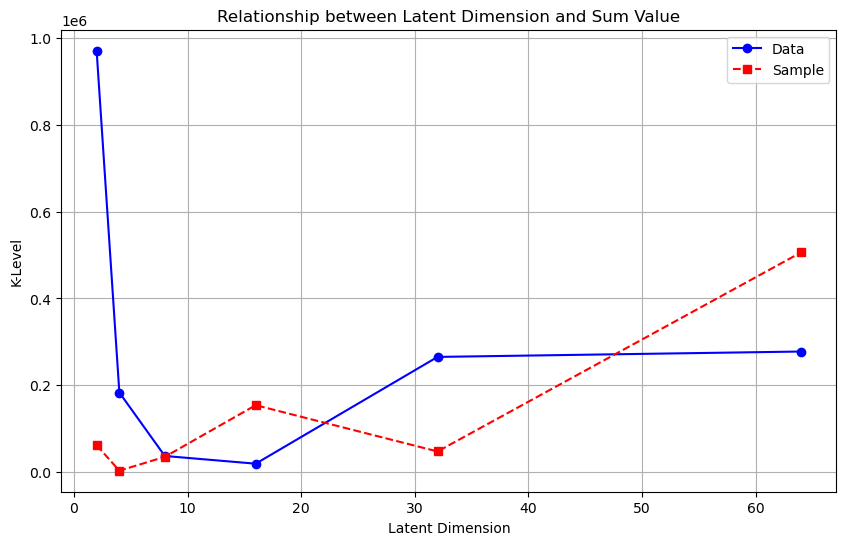

In [12]:
x_data = df_data["Latent_Dim"]
y_data = df_data["Sum_Value"]

x_sample = df_sample["Latent_Dim"]
y_sample = df_sample["Sum_Value"]


# Plotting
plt.figure(figsize=(10, 6))

# Plot data from df_data
plt.plot(x_data, y_data, marker="o", linestyle="-", color="b", label="Data")

# Plot data from df_sample
plt.plot(x_sample, y_sample, marker="s", linestyle="--", color="r", label="Sample")

# Adding labels and title
plt.xlabel("Latent Dimension")
plt.ylabel("K-Level")
plt.title("Relationship between Latent Dimension and Sum Value")

# Show grid, legend, and plot
plt.grid(True)
plt.legend()
plt.show()

In [5]:
random_forest = load("../models/Classifier/random_forest_model.joblib")

In [16]:
# New dictionary to store F1 scores for each key
f1_scores_dict_data = {}
# Iterate over each key (file name) in data_dict
for file_name, data_df in data_files.items():
    # Extract features (X) and target variable (y)
    X = data_df.drop(columns="Class").values # Features
    y_true = data_df["Class"].values  # True labels

    # Make predictions
    y_pred = random_forest.predict(X)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Store F1 score in the new dictionary
    f1_scores_dict_data[file_name] = f1

c:\Users\Max_G\anaconda3\envs\var_auto\lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [17]:
# New dictionary to store F1 scores for each key
f1_scores_dict_sample = {}
# Iterate over each key (file name) in data_dict
for file_name, sample_df in sample_files.items():
    # Extract features (X) and target variable (y)
    X = sample_df.drop(columns="Class").values  # Features
    y_true = sample_df["Class"].values  # True labels

    # Make predictions
    y_pred = random_forest.predict(X)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Store F1 score in the new dictionary
    f1_scores_dict_sample[file_name] = f1

In [18]:
f1_scores_dict_data
f1_scores_dict_sample

{'16_128_data.csv': 0.7884615384615385,
 '2_128_data.csv': 0.0,
 '32_128_data.csv': 0.9828571428571428,
 '4_128_data.csv': 0.0,
 '64_128_data.csv': 0.9710982658959537,
 '8_128_data.csv': 0.8142292490118578}

In [28]:
keys_data = [int(key.split("_")[0]) for key in f1_scores_dict_data.keys()]
sums_data = [(f1_scores_dict_data[key]) for key in f1_scores_dict_data.keys()]

# Create DataFrame
df_data_f1 = pd.DataFrame({"Latent_Dim": keys_data, "Sum_Value": sums_data})

# Sort DataFrame by "Latent_Dim"
df_data_f1 = df_data_f1.sort_values(by="Latent_Dim")

In [30]:
keys_sample = [int(key.split("_")[0]) for key in f1_scores_dict_sample.keys()]
sums_sample = [(f1_scores_dict_sample[key]) for key in f1_scores_dict_sample.keys()]

# Create DataFrame
df_sample_f1 = pd.DataFrame({"Latent_Dim": keys_sample, "Sum_Value": sums_sample})

# Sort DataFrame by "Latent_Dim"
df_sample_f1 = df_sample_f1.sort_values(by="Latent_Dim")

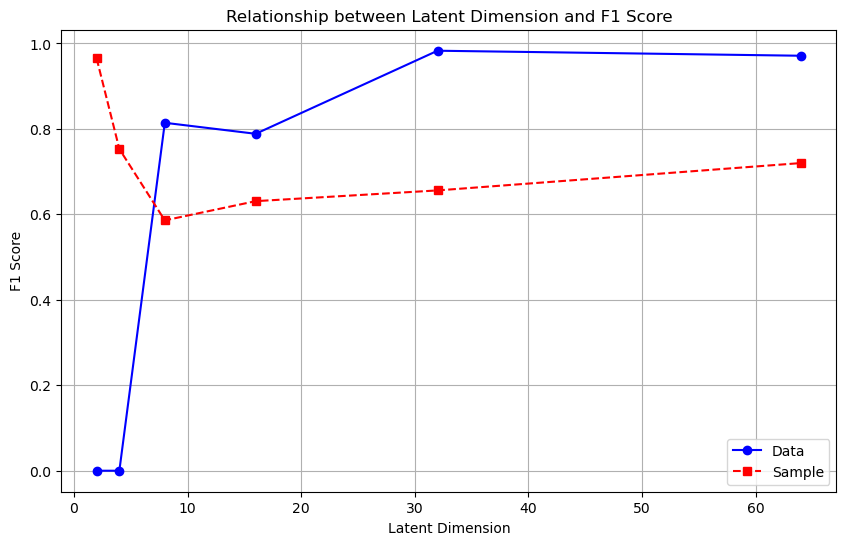

In [32]:
x_data = df_data_f1["Latent_Dim"]
y_data = df_data_f1["Sum_Value"]

x_sample = df_sample_f1["Latent_Dim"]
y_sample = df_sample_f1["Sum_Value"]


# Plotting
plt.figure(figsize=(10, 6))

# Plot data from df_data
plt.plot(x_data, y_data, marker="o", linestyle="-", color="b", label="Data")

# Plot data from df_sample
plt.plot(x_sample, y_sample, marker="s", linestyle="--", color="r", label="Sample")

# Adding labels and title
plt.xlabel("Latent Dimension")
plt.ylabel("F1 Score")
plt.title("Relationship between Latent Dimension and F1 Score")

# Show grid, legend, and plot
plt.grid(True)
plt.legend()
plt.show()